# Plotting in Python
This notebook provides detailed examples of how to make plots in Matplotlib and Seaborn. There are many ways to do the same thing in both of these libraries. As always, read the documentation for more details.

MatplotLib: https://matplotlib.org/

Seaborn: https://seaborn.pydata.org/

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

% matplotlib inline

In [2]:
df = pd.read_csv("./titanic_clean.csv")

# MATPLOTLIB

### Histograms

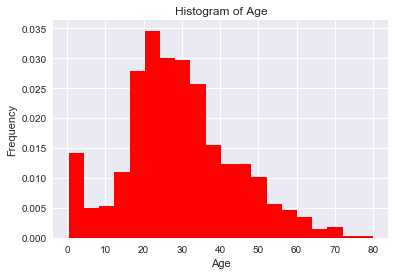

In [3]:
df['Age'].plot(kind='hist', bins=20, normed=1, facecolor='red', title='Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10fcf5e50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10fd6dd50>], dtype=object)

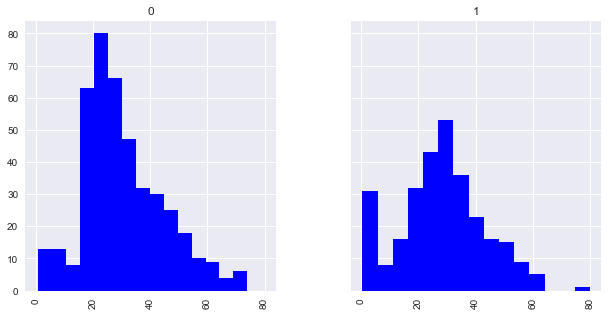

In [4]:
df.hist(column='Age',          # choose continuous var for histogram
        bins = 15,             # set number of bins
        by = 'Survived',       # divide into seperate histograms
        color = 'b',           # set color
        sharex = True,         # share the X axis for comparison
        sharey = True,         # share the Y axis for comparison
        layout=(1,2),          # number of axes in a figure
        figsize=(10,5))        # size of figure

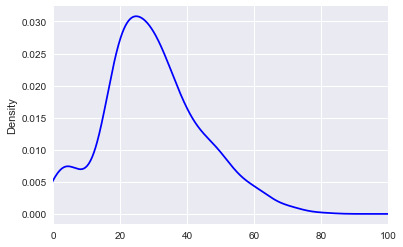

In [5]:
# # compare with density plot (smooth version of a histogram)
df['Age'].plot(kind='density', xlim=(0, 100), color='b')

### Stacked Histogram

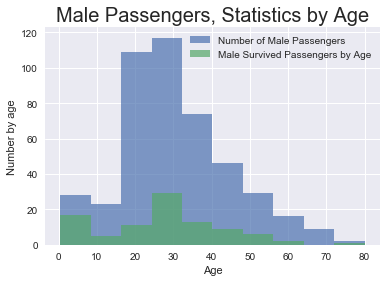

In [6]:
# Data for male passengers
male = df[df.Sex=='male']
male.Age.hist(alpha=0.7)
male[male.Survived==1].Age.hist(alpha=0.7)

# Labels, title, legend
plt.xlabel("Age")
plt.ylabel("Number by age")
plt.title("Male Passengers, Statistics by Age", fontsize=20)
plt.legend(["Number of Male Passengers", 
           "Male Survived Passengers by Age"])

### Scatterplot

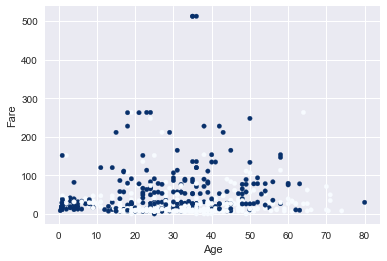

In [10]:
df.plot(kind='scatter', x='Age', y='Fare', c='Survived', 
        colormap='Blues', # set the color scale
        colorbar = False) # because survived is binary, you can remove bar indicating color scale

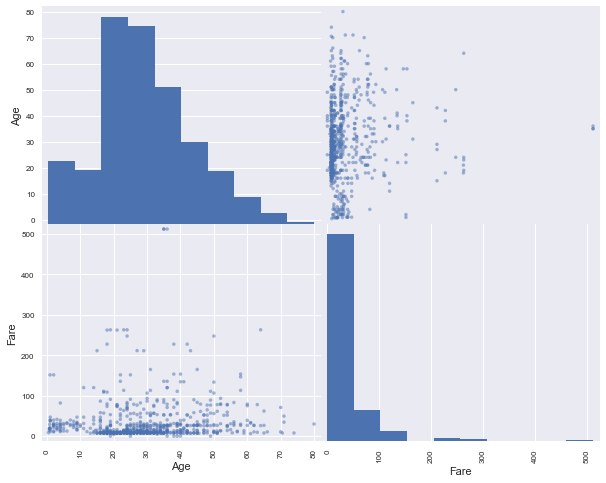

In [97]:
pd.plotting.scatter_matrix(df[['Age', 'Fare']], \
                           figsize=(10, 8), color='b');

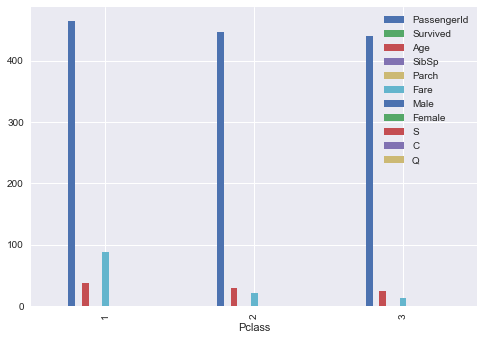

In [126]:
# group dataframe by 'Pclass' and plot average value for each variable
df.groupby('Pclass').mean().plot(kind='bar') 

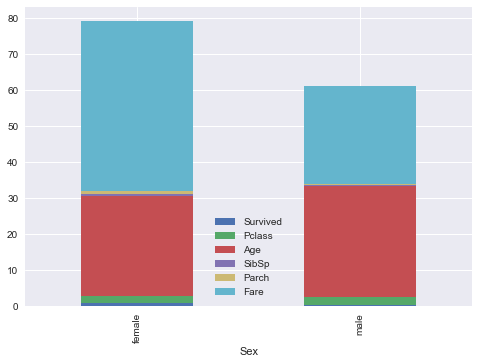

In [100]:
# group dataframe by 'Sex' and plot stacked average values for each variable
df.groupby('Sex').mean().drop(['PassengerId'], axis=1).plot(kind='bar', stacked='True')

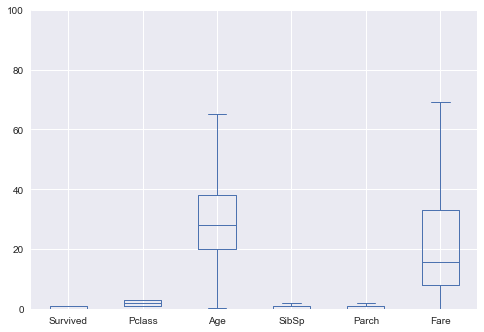

In [101]:
# you can chain a plot at the end of a groupby that results in a new df
df.drop('PassengerId', axis=1).plot(kind='box',ylim=(0,100), color='b')

### Scatterplot

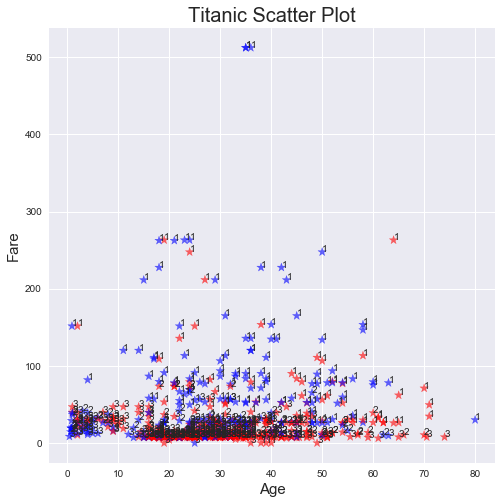

In [11]:
surv_colors = {0:'r', 1:'b'}                                      # create which colors go where

fig, ax = plt.subplots(figsize=(8,8))                             # create figure and axes objects, set size

ax.scatter(
        x = df['Age'],                                            # choose var for X axis
        y = df['Fare'],                                           # choose var for Y axis
        c = df['Survived'].apply(lambda x: surv_colors[x]),       # set colors to values
        s = 80,                                                   # choose size of points
        alpha = .6,                                               # choose transparency of points
        marker = '*')                                             # change shape to * 

ax.set_xlabel('Age', fontsize=15)                                 # set xlab, change font
ax.set_ylabel('Fare', fontsize=15)                                # set ylab, change font
ax.set_title('Titanic Scatter Plot', fontsize=20)                 # set title, change font


for i in range(len(df)):                                          # annotate each point with Pclass
    ax.annotate(df.loc[i, 'Pclass'], (df.loc[i, ['Age']], df.loc[i,['Fare']]))

# SEABORN

### Jointplot

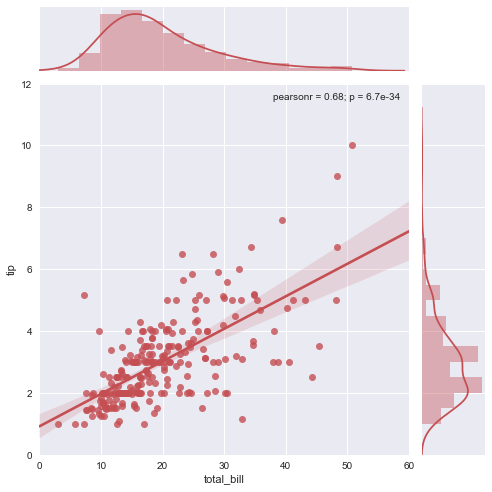

In [15]:
sns.set(style="darkgrid", color_codes=True)

tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)

### Heatmap

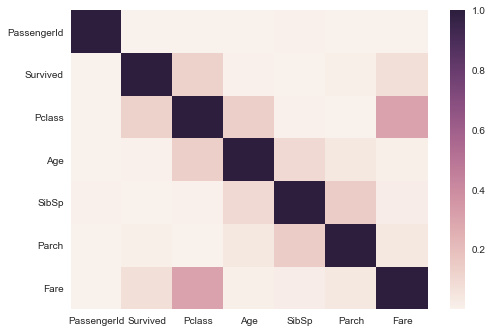

In [17]:
sns.heatmap(df.corr()**2)

### Linear Model Plot / Scatter Plot

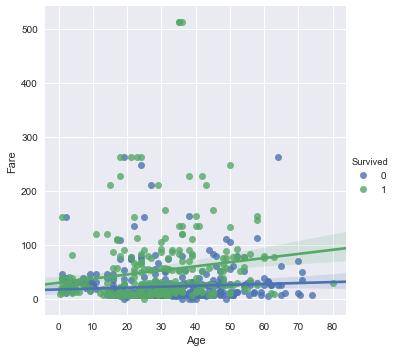

In [12]:
sns.lmplot(x='Age', y='Fare', 
           #fit_reg=False, # No regression line
           hue='Survived', # Color by Survived
           data=df)
            

### Distribution Chart

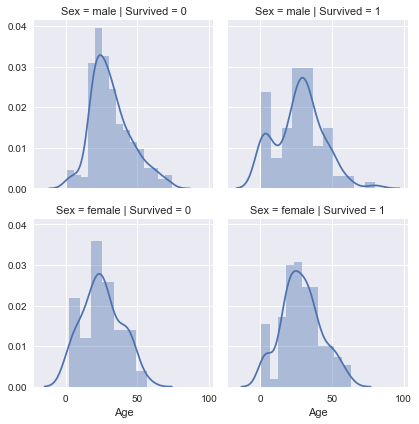

In [13]:
# seperate plots based on categorical columns

g = sns.FacetGrid(data=df, 
                  col='Survived',     # the columns of graph grid are split on Survived var
                  row='Sex')          # the rows of graph grid are split on Sex var

g.map(sns.distplot, 'Age')             # use .map method on the FacetGrid object to plot something

### Swarmplot

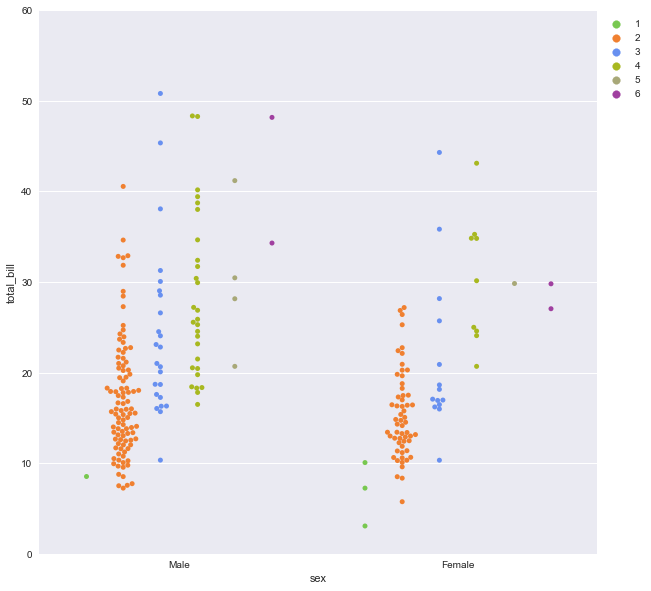

In [18]:
tips = sns.load_dataset("tips")

plt.figure(figsize=(10,10))
 
sns.swarmplot(x='sex', 
              y='total_bill', 
              data=tips, 
              hue='size', 
              split=True,                 # 2. Separate points by hue
              palette=pkmn_type_colors)   # 3. Use Pokemon palette (see bottom of notebook)
 
# 4. Adjust the y-axis
plt.ylim(0, 60)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

### Barplot

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

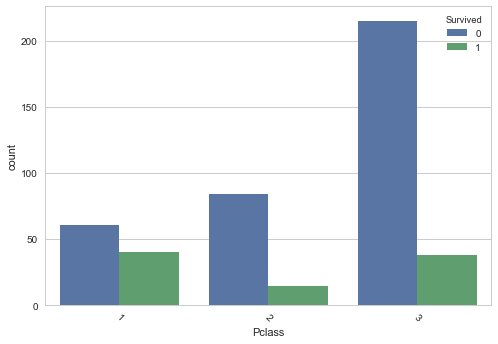

In [60]:
# Count Plot (a.k.a. Bar Plot)
sns.set_style('whitegrid')
sns.countplot(x='Pclass', hue='Survived', data=df[df['Sex']=='male'])
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Pairplot

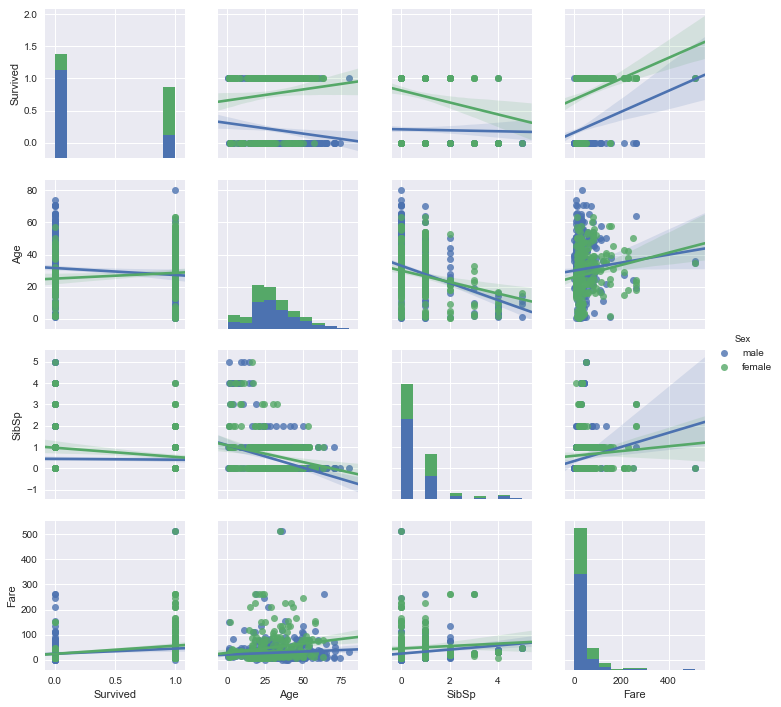

In [59]:
sns.pairplot(df[['Survived', 'Age', 'SibSp', 'Fare', 'Sex']],     # select columns of data to plot
             hue = 'Sex',                                         # choose a categorical var for color
             kind = 'reg');                                       # can be 'scatter' or 'reg'

### Boxplot

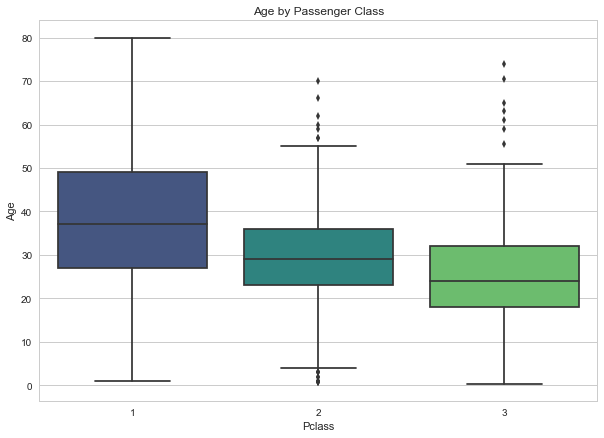

In [63]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette= 'viridis').set_title('Age by Passenger Class')
plt.show()

### Stacked Histogram

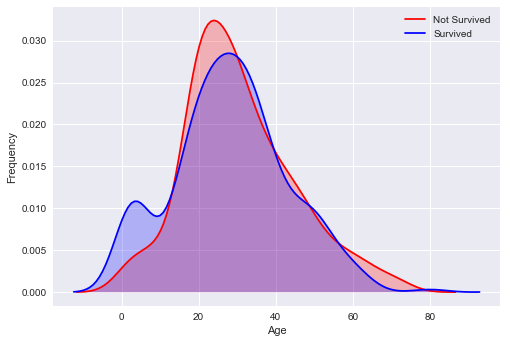

In [66]:
# Explore Age distibution 
g = sns.kdeplot(df["Age"][(df["Survived"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["Survived"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

### Barplot

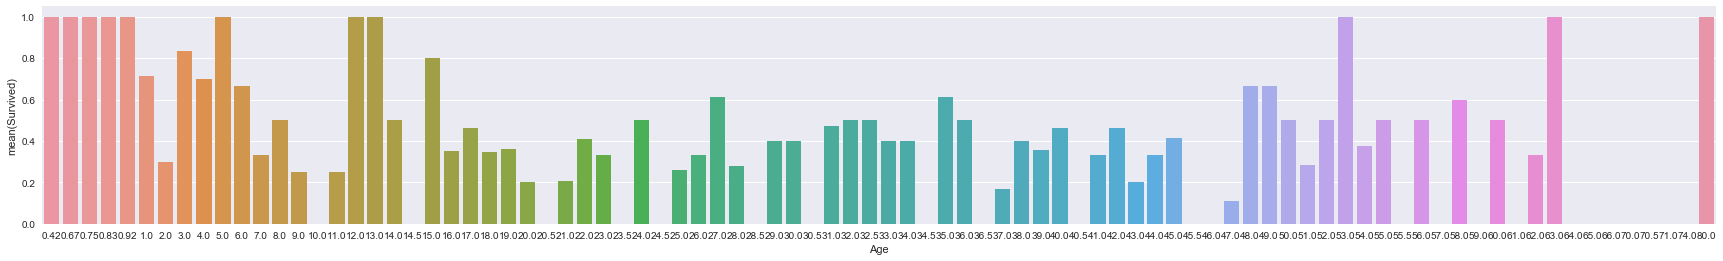

In [19]:
fig, axis1 = plt.subplots(1,1,figsize=(30,4))
average_age = df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

### Heatmap

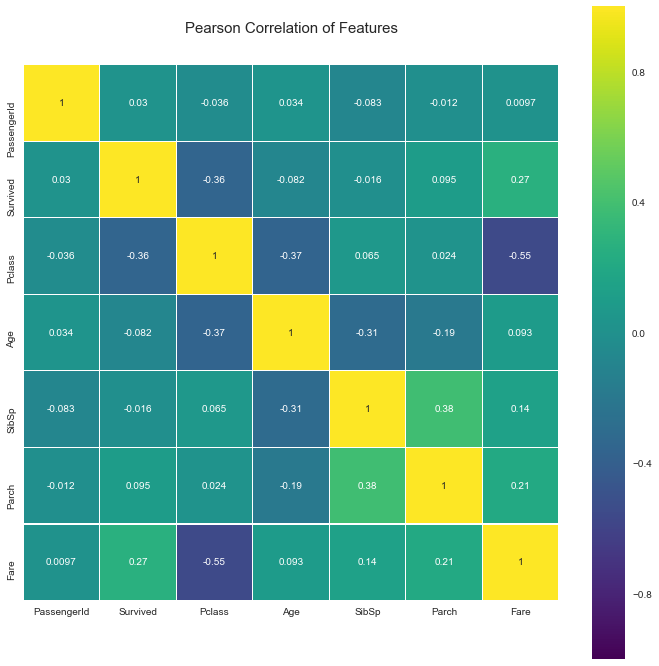

In [20]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

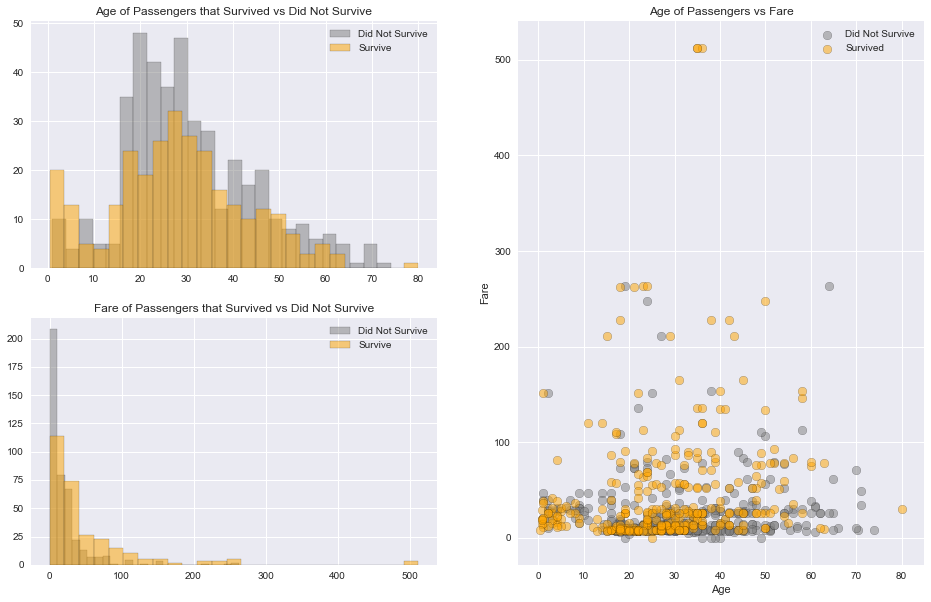

In [89]:
# Subplots of Numeric Features
# Split each graph into 'Survived' and 'Did Not Survive'
## Must plot twice with a different subset of data each time

sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))

# Top Left
ax1 = fig.add_subplot(221)

ax1.hist(df[df['Survived'] == 0].Age,
         bins = 25, 
         label ='Did Not Survive', 
         alpha = .50, 
         edgecolor= 'black', 
         color ='grey')
ax1.hist(df[df['Survived'] == 1].Age, 
         bins = 25, 
         label = 'Survive', 
         alpha = .50, 
         edgecolor = 'black', 
         color = 'orange')
ax1.set_title('Age of Passengers that Survived vs Did Not Survive')
ax1.legend(loc = 'upper right')

# Bottom Left
ax2 = fig.add_subplot(223)
ax2.hist(df[df['Survived'] == 0].Fare, 
         bins = 25, 
         label = 'Did Not Survive', 
         alpha = .50, 
         edgecolor ='black', 
         color = 'grey')
ax2.hist(df[df['Survived']==1].Fare, 
         bins = 25, 
         label = 'Survive', 
         alpha = .50, 
         edgecolor = 'black', 
         color ='orange')
ax2.set_title('Fare of Passengers that Survived vs Did Not Survive')
ax2.legend(loc = 'upper right')

# Right Side
ax3 = fig.add_subplot(122)
ax3.scatter(x = df[df['Survived'] == 0].Age, 
            y = df[df['Survived'] == 0].Fare,
            alpha = .50,edgecolor= 'black', 
            c = 'grey', 
            s= 75, 
            label = 'Did Not Survive')
ax3.scatter(x = df[df['Survived'] == 1].Age, 
            y = df[df['Survived'] == 1].Fare, 
            alpha = .50,edgecolor= 'black', 
            c = 'orange', 
            s= 75, 
            label = 'Survived')
ax3.set_xlabel('Age')
ax3.set_ylabel('Fare')
ax3.set_title('Age of Passengers vs Fare')
ax3.legend()

plt.show()

### Multiple Bar Plots & Histograms

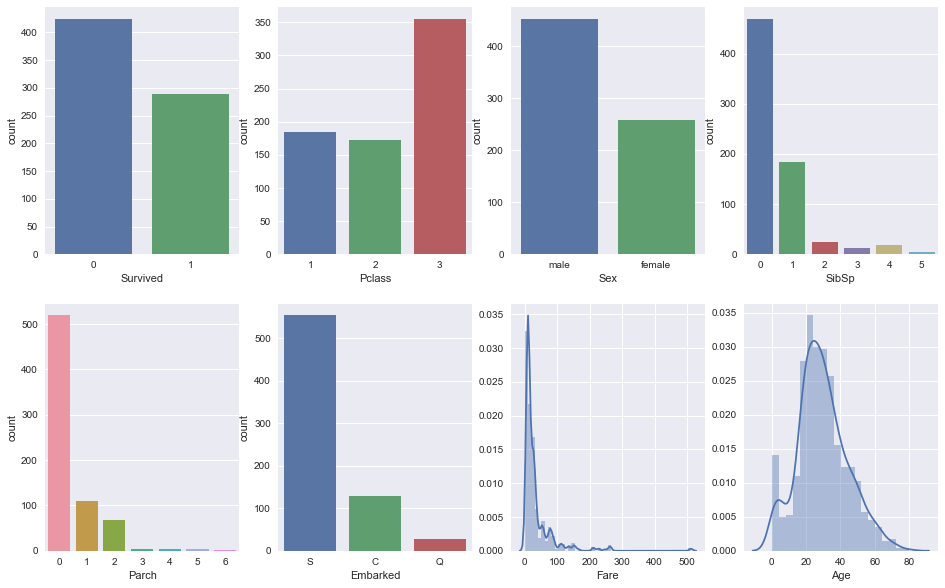

In [91]:
# create graph grid with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

# make plot for each cell of graph grid, assign location using ax=axes[row, column]
sns.countplot('Survived',data=df,ax=axes[0,0])
sns.countplot('Pclass',data=df,ax=axes[0,1])
sns.countplot('Sex',data=df,ax=axes[0,2])
sns.countplot('SibSp',data=df,ax=axes[0,3])
sns.countplot('Parch',data=df,ax=axes[1,0])
sns.countplot('Embarked',data=df,ax=axes[1,1])
sns.distplot(df['Fare'], kde=True,ax=axes[1,2])
sns.distplot(df['Age'].dropna(),kde=True,ax=axes[1,3])

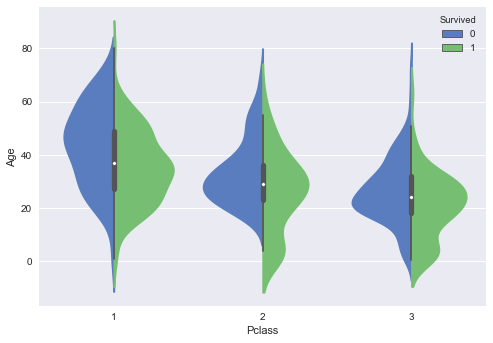

In [93]:
sns.violinplot(x="Pclass", 
               y="Age", 
               hue="Survived",
               data=df, 
               palette="muted", 
               split=True)

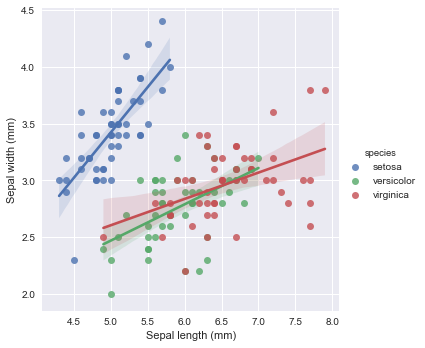

In [22]:
sns.set()

# Load the example tips dataset
iris = sns.load_dataset("iris")

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True,        # this ends the linear model at end of data for the group
               size=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")  # (xlab, ylab)

## 3D Plot

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


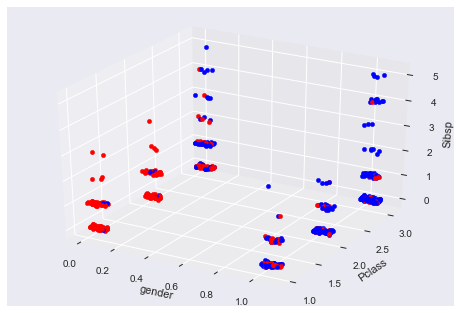

In [125]:
from mpl_toolkits.mplot3d import Axes3D
import sys

#Print you can execute arbitrary python code
train = pd.read_csv("./titanic_clean.csv", dtype={"Age": np.float64}, )
test = pd.read_csv("./titanic_clean.csv", dtype={"Age": np.float64}, )

train["Age"][np.isnan(train["Age"])] = np.median(train["Age"])

train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

train["Male"] = train['Sex'].apply(lambda x:1 if x=='male' else 0)
train["Female"] = train['Sex'].apply(lambda x:1 if x!='male' else 0)

train["S"] = train['Embarked'].apply(lambda x:1 if x=='S' else 0)
train["C"] = train['Embarked'].apply(lambda x:1 if x=='C' else 0)
train["Q"] = train['Embarked'].apply(lambda x:1 if x=='Q' else 0)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for n,point in train.iterrows():
    gender = (1 if point['Male'] else 0 ) + np.random.rand()/10
    pclass = point['Pclass'] + np.random.rand()/10
    surv = point['Survived'] 
    third_feature = point['SibSp'] + np.random.rand()/10
    color = 'red' if surv else 'blue'

    ax.scatter(gender, pclass, third_feature, c=color)

ax.set_xlabel('gender')
ax.set_ylabel('Pclass')
ax.set_zlabel('Sibsp')

plt.show()

plt.savefig('viz.png')

## Style

### Defining your own palette

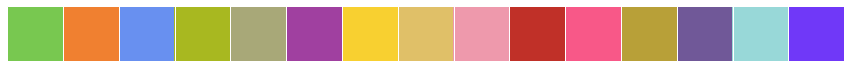

In [14]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

sns.palplot(pkmn_type_colors)

### All Seaborn & Matplotlib Palettes

In [15]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

### Print current color palette

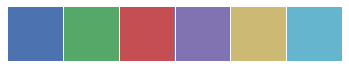

In [16]:
current_palette = sns.color_palette()
sns.palplot(current_palette)